# FPL Project

## Introduction to the English Premier League

The English Premier League (EPL), better known as the Premier League, is the top-flight professional football league in England. In addition to being the most competitive football league in the world according to the UEFA Coefficient Ranking, the Premier League is the most-watched sports league in the world, with millions of fans tuning in to watch the weekly matches from all over the globe.

The league consists of twenty teams from all over England, and the season generally runs from August to May. Every team plays every other team twice, once at home and once away, resulting in a total of 38 games. Winning a game gets the team three points, a draw gets one and a loss gets zero. At the end of the season, the team with the highest number of points is crowned the champions. The three teams with the lowest number of points get relegated to the second tier of English football, also known as the Championship for the following season. Similarly, three of the best teams in the Championship get promoted to the Premier League. Since gaining points is critical for both the top and the bottom of the league, the vast majority of games are fiercely competitive.

The Premier League is the home of many important and famous football clubs, including Chelsea, Manchester United, Manchester City, Arsenal, and Liverpool, each of whom was champion at least once in the past twenty years. The Premier League has also helped develop many of the world's best players, including Cristiano Ronaldo, Luis Suarez, Thierry Henry, and Wayne Rooney.

Overall, the Premier League is a powerhouse in world football, offering fans high-quality football, and competitive matches, featuring some of the biggest and best clubs in the world. Its global popularity is a testament to the league's influence, and it will undoubtedly attract the world's best players for years to come.

## Introduction to Fantasy Premier League

Fantasy Premier League (FPL) is an online strategy game that casts the player in the role of a Fantasy manager. Each manager assembles a virtual team of real-life football players in the English Premier League and scores points based on their real-life performance in their Premier League matches. The goal for each manager in FPL is to maximise their points by the end of the season.

At the beginning of the season, managers are allocated a budget of £100 million to build their team of 15 players. Prices of players are assigned at the beginning of the season, then they fluctuate throughout the season based on their performance.

Points are awarded to players for goals, assists, saves, and clean sheets as well as bonus points, which are awarded to the top-performing individuals in a match. Points can also be taken away for yellow cards, red cards, and goals conceded. A team's points for the match round or "gameweek" will be scored by the starting XI. There are 38 gameweeks every season; one for each match.


## Project Goal

FPL is a popular game amongst fans of the English Premier League, as Fantasy managers attempt to build an optimal team of players every gameweek. Fantasy managers can only guess the optimal combination of players because they must pick their teams before any real-life Premier League games occur. In other words, there is *uncertainty* regarding which players will perform the best. For this project, we will be removing this uncertainty by using the FPL dataset of the 2016-2017 season, which has already recorded the number of points each player attains for every gameweek.

The goal of this project is to find the optimal combination of players over the 38-week 2016-2017 season that maximises the total number of FPL points. This project can be considered an optimisation problem, because we are attempting to maximise the total number of points of our team in the 2016-2017 season, whilst adhering to a multitude of different constraints.

## Constraints & Extra Rules

The main constraints that we will be analysing are:

1. Position Constraint: Each manager must select a team of 15 players, consisting of 2 goalkeepers, 5 defenders, 5 midfielders, and 3 forwards.

2. Price Constraint: The total price of the 15 players cannot exceed £100 million at the beginning of the season.

3. Formation Constraint: The starting XI of each team must play with a formation of 1 goalkeeper, 3-5 defenders, 2-5 midfielders, and 1-3 forwards. The remaining four players would be on the bench, but the chosen formation can change before each gameweek.

4. Team Constraint: Each manager can have a maximum of three players from the same Premier League team at any point in the season.

5. Transfer Constraint: Each manager is allowed one free transfer per week. Any subsequent transfers result in a four-point deduction for that gameweek. A manager can transfer or "exchange" any of their players for a different player, given that the price constraint still holds.

These constraints will make the calculation of the optimal team more difficult, as we cannot just pick the highest-scoring players from each gameweek. We can classify these constraints into "team-building constraints" and a "team-evaluating constraint". The first four of these constraints interfere with the building of the team, in the sense that the team would be invalid if they are not satisfied. The last constraint, the transfer constraint is considered a "team-evaluating constraint" because it does not interfere with the building of the team. Having more transfers does not invalidate a team, but rather "punishes" teams for transferring more players by decreasing the total number of points

There are some extra rules in FPL that can help managers increase their points total. Captaincy should be assigned every week and the Wildcard can be used twice per season. The three chips can only be used in a single gameweek of choice. Here are some more in-depth descriptions of the rules:

1. Captaincy: One player every week can be named captain. Their points are doubled for that gameweek.

2. Bench Boost Chip: The points scored by the bench players in the next gameweek are included in the points total.

3. Free Hit Chip: Make unlimited free transfers for a single gameweek. At the next deadline, the squad is returned to how it was at the start of the gameweek.

4. Triple Captain Chip: The captain points are tripled instead of doubled for that gameweek.

5. Wildcard: All transfers in the gameweek are free of charge. Each manager gets two wildcards; one in the first half of the season and one in the second half of the season.

## Introduction to the Dataset

In order to find the optimal FPL team, we need to use a dataset that includes the gameweek-to-gameweek performances of all players. We decided to use [this](https://github.com/vaastav/Fantasy-Premier-League) dataset compiled by Vaastav Anand that includes comprehensive statistics for an array of different features for every player per gameweek, including 'minutes played', 'passes completed', 'shots off target' and even 'errors leading to a goal attempt'. Key to this project, we will only be needing to use the 'name', 'total points', 'price', 'position', 'team' and 'player ID' features. These features will be key to ensuring that all of the constraints are satisfied. We can take a look at a snippet of the dataset below:

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [67]:
def data(gw):

    gw = pd.read_csv('gws/gw' + str(gw) + '.csv', encoding='latin1').sort_values(by = 'element').reset_index(drop=True).reindex() # Load gameweek data
    pos_data = pd.read_csv('players_raw.csv', encoding='latin1').rename(columns={'id': 'element'}) # Load position data
    gw = pd.merge(gw, pos_data[['element', 'element_type','team']], on=['element'], how='left') # Extract Important Columns from Position data and Merge dataframes
    gw = gw[['name','total_points','value','element_type','team','element']].rename(columns={'value':'price', 'element_type':'position', 'element':'unique_id'}) # Extract the important columns
    gw['price'] = gw['price'] / 10.0 # Divide the price by ten to fit into the £100 million constraint
    return gw

data(2)

,name,total_points,price,position,team,unique_id
0,David_Ospina,0,5.0,1,1,1
1,Petr_Cech,6,5.5,1,1,2
2,Laurent_Koscielny,7,6.0,2,1,3
3,Per_Mertesacker,0,5.0,2,1,4
4,Gabriel Armando_de Abreu,0,5.0,2,1,5
...,...,...,...,...,...,...
532,Steven_Pienaar,1,5.0,3,15,533
533,Reece_Burke,0,4.0,2,20,534
534,Ashley_Fletcher,1,5.0,4,20,535
535,Ryan_Fraser,2,5.0,3,2,536


This is the dataset for the second gameweek of the 2016-2017 FPL season. In the first column, we have a list of all the players that are in the game. The second column includes the total number of points that the player has scored in this gameweek. For example, the player Petr Cech scored a total of 6 points in this gameweek. The third column is the price of buying the player in this gameweek. This is a very important column because the prices of players fluctuate during the season depending on their performance. For example, a player may start off by costing £5.0 million, but due to great performances may end the season costing £6.2 million. It is critical that we keep track of how the prices of players change because this can affect how we choose our optimal team according to our price constraint. The position column is encoded so that '1's are goalkeepers, '2's are defenders, '3's are midfielders, and '4's are forwards. The team column is also encoded for each of the 20 teams in the Premier League. For this project, the team names are not important, we just need to ensure that we do not have more than three players from any one team, as per the team constraint. The unique ID column is also critical to our analysis, as it assigns a number to each player, and we can use this to compare a player's performance across multiple gameweeks. Let us take a closer look at the total_points, price, position, and team variables to get a more comprehensive idea of how these variables work.

## Data Exploration

#### Analysing Total Points

The total points column is one of the most important columns in this dataset because it is the variable that we are trying to maximise. Before we analyse this column, let's take a look at the table below, which shows how players can attain points in FPL:

Action | Points
--- | ---
Playing up to 60 minutes | 1
Playing more than 60 minutes | 2
Scoring a goal by a goalkeeper or defender| 6
Scoring a goal by a midfielder | 5
Scoring a goal by a forward | 4
Assisting a goal | 3
Keeping a clean sheet by a goalkeeper or defender | 4
Keeping a clean sheet by a midfielder | 1
Saving three shots by a goalkeeper | 1
Saving a penalty | 5
Missing a penalty | -2
Conceding two goals by a goalkeeper or defender | -1
Getting a yellow card | -1
Getting a red card | -3
Scoring an own goal | -2
Bonus point for the best players | 1-3

There is a multitude of different ways for players to gain (or lose) points throughout a game. We can use the table above to figure out how many points a player achieves in a single game. For example, we can deduce that a defender who played 72 minutes and scored a goal, but conceded two goals and got a yellow card would attain 2 + 6 - 1 - 1 = 6 points. It is also possible to get a negative total number of points. For example, a midfielder who played 54 minutes and scored an own goal would be given 1 - 2 = -1 points. 

Let's now take a look at the distribution of points amongst the players in the second gameweek, and analyse a few of the summary statistics:

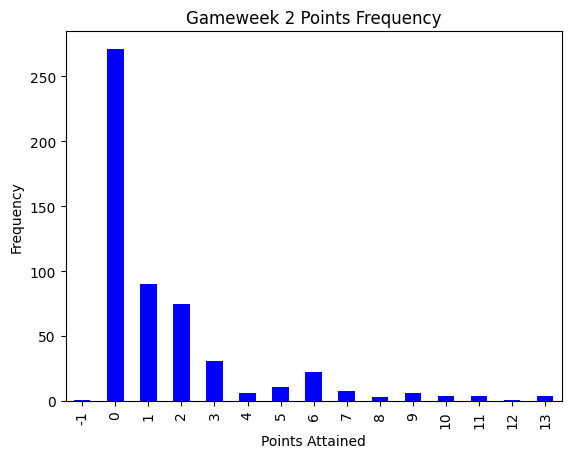

Mean number of points: 1.54
Standard Deviation: 2.5
Median number of points: 0.0
Proportion of players who attained zero points or less: 0.51
Proportion of players who attained one or two points: 0.31
Proportion of players who attained three points or more: 0.19
Proportion of players who attained six points or more: 0.1
Proportion of players who attained eight points or more: 0.04


In [68]:
df = pd.DataFrame(data(2)['total_points'])
fig, ax = plt.subplots()
df['total_points'].value_counts().sort_index().plot(ax = ax, kind='bar', title='Gameweek 2 Points Frequency', xlabel='Points Attained', ylabel='Frequency', color='blue')
plt.show()

print("Mean number of points:", round(df.mean().item(),2))
print("Standard Deviation:", round(df.std().item(),2))
print("Median number of points:", round(df.median().item(),2))
print("Proportion of players who attained zero points or less:", round(len(df[df['total_points'] <= 0]) / len(df['total_points']), 2))
print("Proportion of players who attained one or two points:", round(len(df[df['total_points'] == 1] + df[df['total_points'] == 2]) / len(df['total_points']), 2))
print("Proportion of players who attained three points or more:", round(len(df[df['total_points'] >= 3]) / len(df['total_points']), 2))
print("Proportion of players who attained six points or more:", round(len(df[df['total_points'] >= 6]) / len(df['total_points']), 2))
print("Proportion of players who attained eight points or more:", round(len(df[df['total_points'] >= 8]) / len(df['total_points']), 2))

From the above plot, we can see that there are a lot of players that have zero points for the second gameweek, with over 250 players attaining this point total or approximately 51% of the players. The majority of these players were unused substitutes and hence were unable to get attain any points. We can also see that the distribution of the points is right-skewed, as only approximately 19% of the players attained three points or more, and only approximately 10% of the players attained six points or more. The easiest method to attain points in FPL is from the two points given for playing at least 60 minutes, which is why we see a big drop-off in the distribution of points after the second point is attained. The demographic of players we are generally interested in for this project lies within the eight points or more range, as this greater number of points will help us maximise the points over a whole season. Only about 4% of the players have this attribute, so we will be zeroing in on this subset of players when trying to find an optimal combination of players.

#### Analysing Price

The price column is a very important column to analyse for this project because the cost of players plays a defining role in the price constraint. Since we have £100 million to spend, we will likely be spending around £100 million / 15 players = £6.6 million per player. Let's see how the prices of players are distributed in the second gameweek using the histogram below:

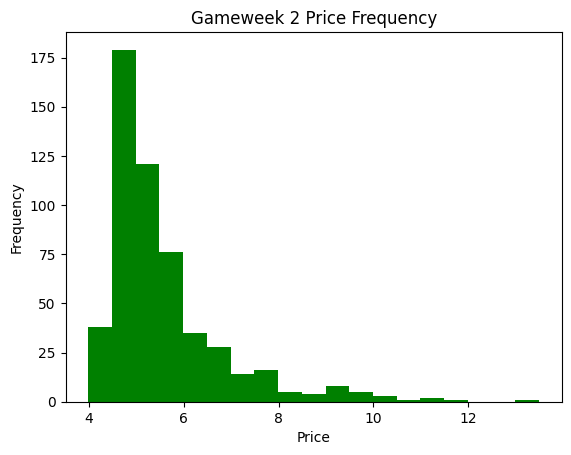

Mean Price: 5.37 million
Standard Deviation: 1.31 million
Median Price: 5.0 million
Proportion of players that cost less than £6 million: 0.77
Proportion of players that cost between £6 million and £8 million: 0.18
Proportion of players that cost more than £8 million: 0.05


In [69]:
df = pd.DataFrame(data(2)['price'])

plt.hist(df, bins=19, range=(3.99,13.49), color= 'green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Gameweek 2 Price Frequency')
plt.show()

print("Mean Price:", round(df.mean().item(),2), "million")
print("Standard Deviation:", round(df.std().item(),2), "million")
print("Median Price:", round(df.median().item(),2), "million")
print("Proportion of players that cost less than £6 million:", round(len(df[df['price'] < 6]) / len(df['price']), 2))
print("Proportion of players that cost between £6 million and £8 million:", round(1 - (len(df[df['price'] < 6]) + len(df[df['price'] > 8])) / len(df['price']), 2))
print("Proportion of players that cost more than £8 million:", round(len(df[df['price'] > 8]) / len(df['price']), 2))

From the histogram plot above, we can see that the vast majority of players cost less than our average spending per player of £6.6 million. 18% of the players have a price near this range, specifically between £6 million and £8 million. Like our total points plot earlier, the price data seems to be right-skewed, as only around 5% of the players are worth more than £8 million.

The reason why some players are more expensive than others is that they are expected to output more points than players who cost less, but this is not always the case due to the uncertainty when playing Premier League games. Most players are very cheap because they are often substitutes, so for most of the season, they will score zero or one point every gameweek. But do more expensive players output more than the less expensive players? Let's take a look at the point distribution of the players who cost more than £8 million.

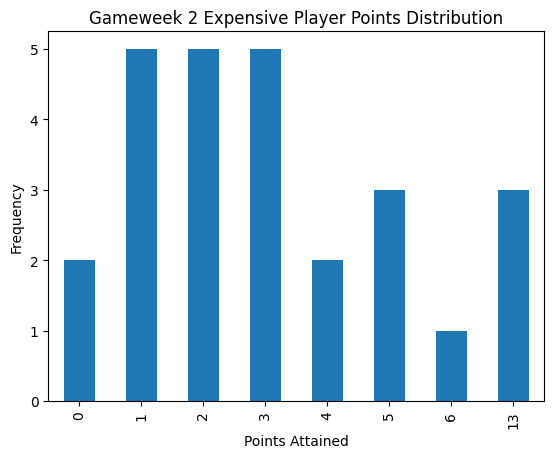

In [70]:
df = pd.DataFrame(data(2)[data(2)['price']>8]['total_points'])
fig, ax = plt.subplots()
df['total_points'].value_counts().sort_index().plot(ax = ax, kind='bar', title='Gameweek 2 Expensive Player Points Distribution', xlabel='Points Attained', ylabel='Frequency')
plt.show()

We can see that their point distribution includes 10 players who only scored one or two points, and there are even a couple of players who scored zero! On the other hand, there are three expensive players who scored the maximum 13 points, which indicates that investing in certain expensive players pays off. No expensive players scored anywhere between 7 and 12 points this gameweek, so there are some cheaper players who outperformed a lot of the expensive players. Investing money from the £100 million budget in those players may be worthwhile, as they maximise points and minimise the cost.

Prices of players also fluctuate throughout the season due to performance. Players who perform well increase their price, whilst players who perform poorly, or do not play enough end up with a decrease in their overall price. Let's take a look at the price distribution of the 38th gameweek, and see how it compares to the second gameweek.

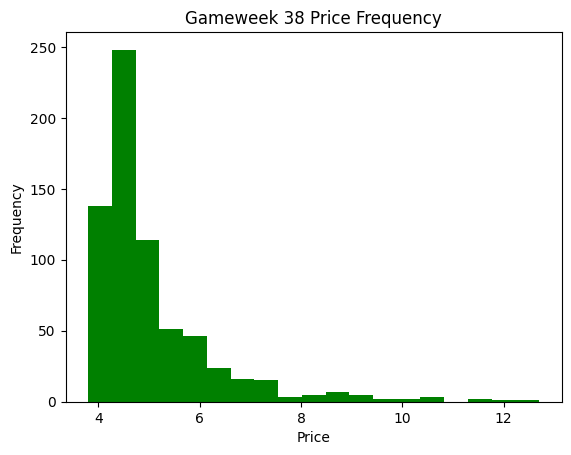

Mean Price: 5.04 million
Standard Deviation: 1.24 million
Median Price: 4.6 million
Proportion of players that cost less than £6 million: 0.86
Proportion of players that cost between £6 million and £8 million: 0.1
Proportion of players that cost more than £8 million: 0.04


In [71]:
df = pd.DataFrame(data(38)['price'])

plt.hist(df, bins=19, color='green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Gameweek 38 Price Frequency')
plt.show()

print("Mean Price:", round(df.mean().item(),2), "million")
print("Standard Deviation:", round(df.std().item(),2), "million")
print("Median Price:", round(df.median().item(),2), "million")
print("Proportion of players that cost less than £6 million:", round(len(df[df['price'] < 6]) / len(df['price']), 2))
print("Proportion of players that cost between £6 million and £8 million:", round(1 - (len(df[df['price'] < 6]) + len(df[df['price'] > 8])) / len(df['price']), 2))
print("Proportion of players that cost more than £8 million:", round(len(df[df['price'] > 8]) / len(df['price']), 2))

Even though there are a lot of changes in prices throughout the season, the price distribution has not changed too much. The main change that occurred between the two gameweeks is that the mean price of players decreased from £5.37 million to £5.04 million, and the median price decreased from £5.0 million to £4.6 million. Again, this can be due to the fact that most of the players in the Premier League do not get to play many minutes on a weekly basis, which leads to a low point count. Attaining a low point count would lead to a price decrease, as they had a weaker performance. It is also interesting, however, that the standard deviation only decreased from £1.31 million to £1.24 million. This means that even though there were a lot of overall price decreases between players, there are also a number of players who performed well over the season and had an increase in their prices. This is further backed up by the proportion of players that cost more than £8 million, which has only decreased by 1% between the 2nd and 38th gameweek.

#### Analysing Position

Like the price column, the position column is important, because we need to ensure that we satisfy the constraints, namely the position and formation constraints. When forming a team, we need to make sure that we have 2 goalkeepers, 5 defenders, 5 midfielders, and 3 forwards. Let's see how the players are distributed between these four categories with the barplot below.

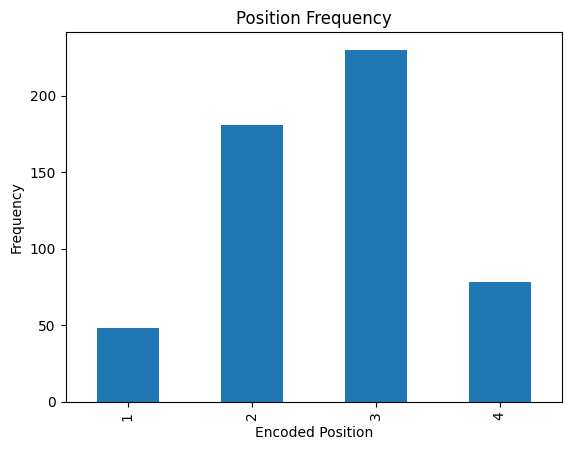

Proportion of players who are goalkeepers: 0.09
Proportion of players who are defenders: 0.34
Proportion of players who are midfielders: 0.43
Proportion of players who are forwards: 0.15


In [72]:
df = pd.DataFrame(data(2)['position'])
fig, ax = plt.subplots()
df['position'].value_counts().sort_index().plot(ax = ax, kind='bar', title='Position Frequency', xlabel='Encoded Position', ylabel='Frequency')
plt.show()

print("Proportion of players who are goalkeepers:", round(len(df[df['position'] == 1]) / len(df['position']), 2))
print("Proportion of players who are defenders:", round(len(df[df['position'] == 2]) / len(df['position']), 2))
print("Proportion of players who are midfielders:", round(len(df[df['position'] == 3]) / len(df['position']), 2))
print("Proportion of players who are forwards:", round(len(df[df['position'] == 4]) / len(df['position']), 2))

As a reminder, we encoded goalkeepers to '1', defenders to '2', midfielders to '3', and forwards to '4'. We can see that the two most popular positions from the plot above are defenders and midfielders, as they collectively comprise 77% of all the players in FPL. The reason for the drastic differences between these four groups is that Premier League teams have a number of players in their squad that is roughly proportional to the number of players that feature in their starting XI. For example, a Premier League team must field one goalkeeper every match, and between three and five defenders. So, it makes sense that Premier League teams have almost four times as many defenders as goalkeepers. This is an interesting comparison, but let us see if there is a difference in price between these groups.

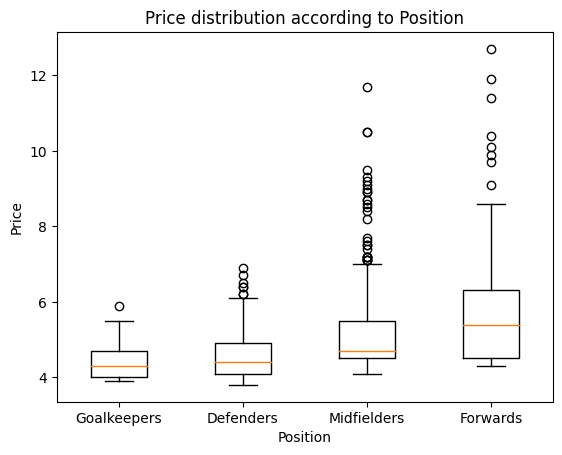

Mean Price of Goalkeepers: 4.4
Mean Price of Defenders: 4.59
Mean Price of Midfielders: 5.23
Mean Price of Forwards: 5.9


In [73]:
gk_df = data(38)[data(38)['position'] == 1]
def_df = data(38)[data(38)['position'] == 2]
mid_df = data(38)[data(38)['position'] == 3]
fwd_df = data(38)[data(38)['position'] == 4]
my_dict = {'Goalkeepers': gk_df['price'], 'Defenders': def_df['price'], 'Midfielders': mid_df['price'], 'Forwards': fwd_df['price']}
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_title('Price distribution according to Position')
ax.set_ylabel('Price')
ax.set_xlabel('Position')
plt.show()
print("Mean Price of Goalkeepers:", round(gk_df['price'].mean(),2))
print("Mean Price of Defenders:", round(def_df['price'].mean(),2))
print("Mean Price of Midfielders:", round(mid_df['price'].mean(),2))
print("Mean Price of Forwards:", round(fwd_df['price'].mean(),2))

We can also see a substantial difference between the four groups here. Goalkeepers have the lowest median price, followed by defenders, then midfielders, and finally forwards. This order is also true when comparing the variation in the four groups. Although most values of players lie between the £4 million and £6 million range, regardless of position, the difference in price points lies in the extremities. For instance, the most expensive forwards are more than double the price of the most expensive goalkeeper! But does investing in more expensive forwards yield a higher point return than investing in less expensive defenders? Let's see by plotting the points per million pounds invested distributions of players by positions, who have scored at least one point throughout each of the gameweeks.

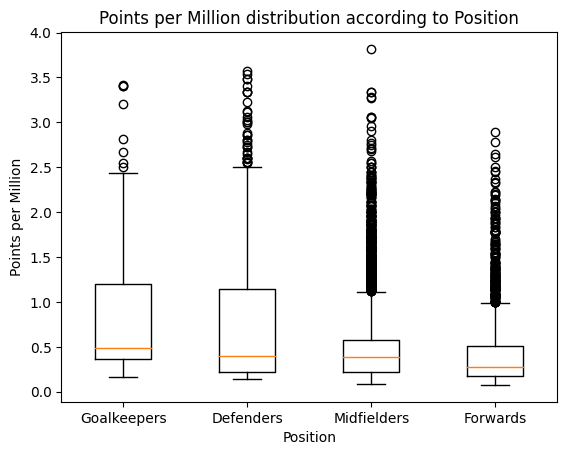

Mean Points per Million of Goalkeepers: 0.77
Mean Points per Million of Defenders: 0.69
Mean Points per Million of Midfielders: 0.51
Mean Points per Million of Forwards: 0.45


In [74]:
df = data(1)
for k in range(2,39):
    df = pd.concat([df, data(k)])
df = df[df['total_points'] > 0]
gk_df = df[df['position'] == 1]
def_df = df[df['position'] == 2]
mid_df = df[df['position'] == 3]
fwd_df = df[df['position'] == 4]
my_dict = {'Goalkeepers': gk_df['total_points'] / gk_df['price'], 'Defenders': def_df['total_points'] / def_df['price'], 'Midfielders': mid_df['total_points'] / mid_df['price'], 'Forwards': fwd_df['total_points'] / fwd_df['price']}
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel('Points per Million')
ax.set_xlabel('Position')
ax.set_title('Points per Million distribution according to Position')
plt.show()
print("Mean Points per Million of Goalkeepers:", round((gk_df['total_points'] / gk_df['price']).mean(),2))
print("Mean Points per Million of Defenders:", round((def_df['total_points'] / def_df['price']).mean(),2))
print("Mean Points per Million of Midfielders:", round((mid_df['total_points'] / mid_df['price']).mean(),2))
print("Mean Points per Million of Forwards:", round((fwd_df['total_points'] / fwd_df['price']).mean(),2))

This plot shows a completely different narrative than the previous one. The previous plot showed that forwards, on average, were the most expensive players and should likely produce the highest return of points, this plot shows that when you take into account the number of points that they attain, the forwards, on average, produce the lowest return on investment. We can infer this from the plot above, as the mean and median values are the lowest for forwards, and the most extreme outlier for forwards is at least 0.5 points per million less than any extreme outlier of any of the other positions. This could indicate to us, that if we have an issue with the price constraint, it may be more useful to invest in a defender as opposed to a forward, as they are generally cheaper.

#### Analysing Team

The team column is an essential component of this dataset because we need it to satisfy the team constraint. As a reminder, the team constraint is that we cannot have more than three players from any one Premier League team during any gameweek. Because of this, we do not need to know which Premier League team any player is specifically on, but rather that they do not have more than two other players from the same Premier League team in our Fantasy team. Let's take a look at the number of players on each team. Since there are twenty teams in the Premier League, the values are encoded from 1 to 20.

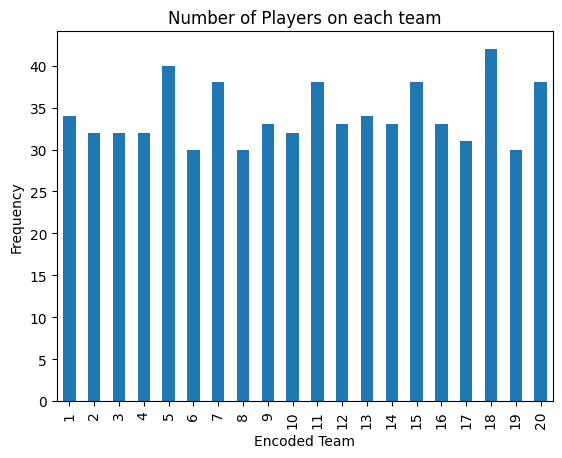

Median number of players on a team: 33.0
Mean number of players on a team: 34.15
Minimum number of players on a team: 30
Maximum number of players on a team: 42


In [75]:
df = pd.DataFrame(data(38)['team'])
fig, ax = plt.subplots()
df['team'].value_counts().sort_index().plot(ax = ax, kind='bar', title='Number of Players on each team', xlabel = 'Encoded Team', ylabel='Frequency')
plt.show()
print("Median number of players on a team:", df['team'].value_counts().median())
print("Mean number of players on a team:", df['team'].value_counts().mean())
print("Minimum number of players on a team:", df['team'].value_counts().min())
print("Maximum number of players on a team:", df['team'].value_counts().max())

There does not seem to be any drastic differences between any of the teams in the Premier League. In fact, the number of players on each Premier League team lies between 30 and 42 players. The mean value is slightly larger than the median value, indicating that the data is slightly skewed to the right. Let's see if the team has any indication of how many points the players earn in total over a season.

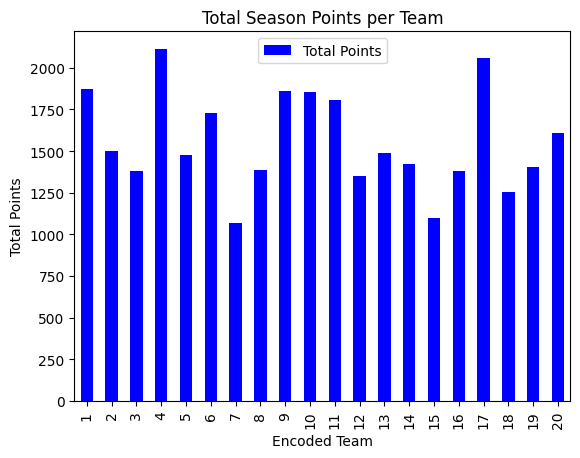

In [76]:
df = data(1)
for k in range(2,39):
    df = pd.concat([df, data(k)])
fig, ax = plt.subplots()
points = []
for k in range(1,21):
    points.append(df.loc[df['team'] == k, 'total_points'].sum())
points = pd.DataFrame(points, columns=["Total Points"])
points.index = points.index + 1
points.plot(kind='bar', title='Total Points', ax=ax, color='blue')
plt.xlabel("Encoded Team")
plt.ylabel("Total Points")
plt.title("Total Season Points per Team")
plt.show()

There seems to be a large variation between all of the teams. Team '4', which is Chelsea, attained the highest number of Fantasy player points throughout the season. In fact, they attained more than double the number of points than Team '7' and Team '15', which are Hull City and Sunderland. This plot is a good indicator of how well a Premier League team does in the season, as Chelsea actually ended up winning the Premier League in the 2016-2017 season, and both Hull City and Sunderland were relegated to the Championship. In addition to Chelsea, we will likely see a lot of players from Teams '1', '9', '10', and '17' in our calculation of an optimal team later in this project, as they have the highest overall returns. For reference, these teams are Arsenal, Liverpool, Machester City, and Tottenham, who placed 5th, 4th, 3rd, and 2nd respectively in the Premier League in the 2016-2017 season.

Now that we have had a comprehensive look at all of the variables in the dataset, let us take a look at the methods that we will be implementing to solve this optimisation problem.

## Methods

For this project, we will be using three classes. The team of the year ([toty](https://github.com/ashabib1/fpl/blob/main/toty.py)) class helps us find the players that cumulatively score the highest number of points in a range of gameweeks. The team of the week ([totw](https://github.com/ashabib1/fpl/blob/main/totw.py)) class helps us find the players that score the highest number of points in a given gameweek. The [evaulate](https://github.com/ashabib1/fpl/blob/main/evaluate.py) class helps us evaluate the number of points achieved in a season, given a list of players for every gameweek. Here is a list of the classes:

In [77]:
from toty import toty
from totw import totw
from evaluate import evaluate

#### Team of the Year Class

Let's start by analysing the process in which each of these classes works, starting with the team of the year (toty) class. As mentioned above, the team of the year class helps us find the players that cumulatively scored the highest number of points in a given gameweek. The only arguments that are required for this class are a range of gameweeks where we would like to find the best possible team. The gameweeks range from 1 to 38, so any range works as long as the initial gameweek is less than the final gameweek. Below is an implementation of this example.

In [78]:
seven_to_twentyone = toty(7,21)

Our 38 datasets in this project are split by gameweek, and each dataset has the individual number of points attained by each player in the respective gameweek. The first step in finding the team of the year is iterating through each dataset in the range of gameweeks given, and aggregating the total number of points for each player. This results in the extraction of two lists: one list with the unique IDs of the highest scoring players in descending total points order, and the second list with the number of points they achieved in total. Below yields an extraction of these two lists from the prior team of the year example.

In [79]:
print("Unique IDs of the highest performing players:")
print("")
print(seven_to_twentyone.top_performers(100))
print("")
seven_to_twentyone.points.sort(reverse=True)
print("Number of points scored by the highest performing players:")
print("")
print(seven_to_twentyone.points[0:100])

Unique IDs of the highest performing players:

[12, 561, 394, 398, 82, 272, 78, 97, 77, 446, 212, 355, 143, 403, 90, 73, 368, 209, 33, 111, 570, 453, 14, 205, 155, 383, 464, 503, 384, 574, 25, 54, 202, 3, 380, 461, 193, 274, 562, 303, 125, 126, 208, 42, 92, 191, 242, 13, 2, 86, 278, 449, 213, 321, 478, 32, 134, 87, 359, 407, 36, 201, 217, 318, 411, 438, 462, 21, 230, 239, 385, 409, 67, 235, 541, 204, 294, 402, 425, 500, 536, 11, 49, 56, 133, 176, 228, 6, 114, 304, 328, 344, 436, 262, 286, 491, 567, 10, 340, 369]

Number of points scored by the highest performing players:

[108, 103, 101, 101, 96, 94, 90, 89, 86, 85, 84, 83, 81, 81, 79, 78, 74, 72, 71, 71, 71, 70, 67, 67, 66, 66, 64, 64, 63, 63, 62, 62, 61, 60, 60, 60, 59, 59, 59, 58, 57, 57, 57, 55, 55, 55, 55, 54, 53, 53, 53, 53, 52, 52, 52, 51, 51, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 47, 47, 47, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 42, 42, 42]


The first list above contains the unique IDs of the highest-scoring players, and the second list contains the number of points they scored over the range of gameweeks that we defined earlier. We can interpret the first values from each list as follows: the player with unique ID 12, Alexis Sanchez, scored a total of 108 points between gameweek 7 and gameweek 21.

Now that we have attained a list of the 100 highest-performing players, we can pick the eleven highest-scoring players, and this would be the best team over the given range of gameweeks. In order to address the formation constraint, we can sort each of these players into four lists, one for each position (goalkeepers, defenders, midfielders, and forwards). In this case, we will have the highest-scoring players of each position in a different dataframe.

Next, we would want to pick eleven players (our starting XI) with the highest points tally from each dataframe that satisfies the formation constraint, which states that the team must have exactly one goalkeeper, at least three defenders, at least two midfielders, and at least one forward. To satisfy this constraint, we can take the highest-scoring goalkeeper, the three highest-scoring defenders, the two highest-scoring midfielders, and the highest-scoring forward and add them to our team of the year. Now, we have four players left to finish our team of the year. Since these last four players can be of any position except goalkeeper, we can just find the highest-scoring players that have not already been chosen, regardless of position. Adding these four players to our team yields the highest-scoring possible team. Let's look at the results from our example below.

In [80]:
print("Team of the Year between Gameweek 7 and Gameweek 21:")
print("")
display(pd.DataFrame(seven_to_twentyone.find_toty(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Total Points:", sum(seven_to_twentyone.find_points()))
print("Total Price:", sum(seven_to_twentyone.find_prices()) / 10)

Team of the Year between Gameweek 7 and Gameweek 21:



,Name,Total Points,Price,Position,Team,Unique ID
0,Thibaut_Courtois,78,55,1,4,73
1,Marcos_Alonso,103,59,2,4,561
2,Gary_Cahill,90,59,2,4,78
3,César_Azpilicueta,86,60,2,4,77
4,Alexis_Sánchez,108,112,3,1,12
5,Christian_Eriksen,101,83,3,17,394
6,Bamidele_Alli,101,83,3,17,398
7,Eden_Hazard,96,99,3,4,82
8,Matt_Phillips,85,53,3,19,446
9,Zlatan_Ibrahimovic,94,115,4,11,272


Total Points: 1031
Total Price: 87.8


Although it does seem that we have gotten a set of the highest-scoring players over these gameweeks, we can see that a lot of the constraints have not been satisfied yet. The position constraint has not been satisfied because we are still missing the four substitute players, who would help to get to the 15-player requirement for a team. Furthermore, we need these four players to satisfy the price constraint. Currently, the price of these players adds up to a value of less than £100 million, but this may change after we add the substitutes. For this set of players, even the team constraint of having no more than three players from one Premier League team is not satisfied. Thibaut Courtois, Marcos Alonso, Gary Cahill, Cesar Azpilicueta, Eden Hazard, and Diego Da Silva Costa all play for the same team: Chelsea. In fact, the only team-building constraint that is satisfied is the formation constraint, which we took into account when building this initial team. Let's now work on finding an optimal team that satisfies these constraints.

In order to tackle the team constraint, which states that there cannot be more than three players on one team, we can choose a different method for constructing the position-dependent dataframes from the two lists that were outputted above. Iterating from the players that have produced the most points to the least points, if there are already cumulatively three players from the same team, then we do not add this player to the position-dependent dataframes. This ensures that any combination of players has a maximum of three players from the same team. In the example above, Marcos Alonso, Eden Hazard, and Gary Cahill are the three highest-scoring Chelsea players. If we use this updated methodology, these three players will be a part of the team and the rest of the Chelsea players will be ineligible to make it into the team.

The most difficult constraint to adhere to is definitely the price constraint, as we are dedicated only a limited budget to invest in the team. Going back to the analysis of the points per million pounds, we saw that forwards generally had the lowest return on interest (ROI) from the four positions, so we can use the concept of lowest ROI to try and fit this constraint in. We can take out the player on the current team of the year that has the lowest ROI (generally the forward), and add the player that has the highest ROI from the best performers that have not been picked for the team. This usually works out, as we would likely get a cheaper player with a high ROI. If the price constraint still is not satisfied, then we do this process again, by removing the player with the second lowest ROI (now the lowest ROI) from our team of the year, and picking the next best player on the best performers list with the highest ROI, that still takes into account all of the other constraints. We repeat this process until the team satisfies the price constraint. 

The position constraint is the final constraint we are attempting to tackle. In fact, this constraint is satisfied hand-in-hand with the price constraint. The position constraint can be thought of as finding four substitutes that satisfy the team. Depending on the other players, the position constraint may need one goalkeeper and three midfielders, or one goalkeeper, one defender, one midfielder, and one forward. If we cannot find four substitutes to fit into a team, both the price and position constraints fail. Whenever we swap out a player, the position constraint generates the cheapest substitutes that satisfy the team and formation constraints, and if this high ROI player swap does not satisfy the price constraint, both the position and price constraints fail. The price constraint iterates through the highest ROI players and simultaneously checks on the position constraint.

Now that we have found a comprehensive method to tackle all four of the team-building constraints, let us look at the final constraint-abiding team for our range of gameweeks. We use the argument **constraints=True** when calling the class to indicate that we take into account these constraints.

In [81]:
print("Team of the Year between Gameweek 7 and Gameweek 21, taking into account constraints:")
seven_to_twentyone_constrained = toty(7,21,constraints=True)
display(pd.DataFrame(seven_to_twentyone_constrained.find_toty(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Substiutes:")
display(pd.DataFrame(seven_to_twentyone_constrained.return_subs(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Total Points:", sum(seven_to_twentyone_constrained.find_points()))
print("Total Price:", (sum(seven_to_twentyone_constrained.find_prices()) + sum(seven_to_twentyone_constrained.return_subs_prices())) / 10)

Team of the Year between Gameweek 7 and Gameweek 21, taking into account constraints:


,Name,Total Points,Price,Position,Team,Unique ID
0,Lee_Grant,63,40,1,14,574
1,Marcos_Alonso,103,59,2,4,561
2,Gary_Cahill,90,59,2,4,78
3,Charlie_Daniels,71,49,2,2,33
4,Alexis_Sánchez,108,112,3,1,12
5,Christian_Eriksen,101,83,3,17,394
6,Bamidele_Alli,101,83,3,17,398
7,Eden_Hazard,96,99,3,4,82
8,Matt_Phillips,85,53,3,19,446
9,Zlatan_Ibrahimovic,94,115,4,11,272


Substiutes:


,Name,Total Points,Price,Position,Team,Unique ID
0,Nick_Pope,0,40,1,3,471
1,Brian_Lenihan,0,39,2,7,148
2,Tyias_Browning,0,39,2,6,130
3,Marvin_Emnes,0,44,4,16,378


Total Points: 995
Total Price: 98.6


There has been a decrease of 36 points between the unconstrained team and the constrained team, but let us double-check that all of the team-building constraints have been satisfied:

1. Position Constraint: The team does have 15 players, consisting of exactly 2 goalkeepers, 5 defenders, 5 midfielders, and 3 forwards, so this constraint is satisfied.

2. Price Constraint: The combined price of the 15 players at the beginning of gameweek seven is £98.6 million, which is less than £100 million, hence satisfying the price constraint.

3. Formation Constraint: The starting XI consists of 1 goalkeeper, 3 defenders, 5 midfielders, and 2 forwards, and the substitutes contain 1 goalkeeper, 2 defenders, and 1 forward, so the formation constraint is satisfied.

4. Team Constraint: Each Premier League team is featured a maximum of three times in this Fantasy team, so the team constraint is satisfied.

Great! We have found an optimal team that satisfies all the team-building constraints from gameweek 7 to gameweek 21. Even the team-evaluating constraint, which is the transfer constraint, is satisfied, as we have not made any transfers over these gameweeks. We shall discuss this in more detail when we get to the team of the week and evaluate classes. Let's see if the same constraints are satisfied when we take into account all 38 gameweeks.

In [82]:
print("Team of the Year between Gameweek 1 and Gameweek 38, taking into account constraints:")
full_toty_constrained = toty(1,38,constraints=True)
display(pd.DataFrame(full_toty_constrained.find_toty(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Substiutes:")
display(pd.DataFrame(full_toty_constrained.return_subs(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Total Points:", sum(full_toty_constrained.find_points()))
print("Total Price:", (sum(full_toty_constrained.find_prices()) + sum(full_toty_constrained.return_subs_prices())) / 10)

Team of the Year between Gameweek 1 and Gameweek 38, taking into account constraints:


,Name,Total Points,Price,Position,Team,Unique ID
0,Tom_Heaton,149,45,1,3,54
1,Gary_Cahill,178,60,2,4,78
2,Leighton_Baines,135,55,2,6,125
3,Charlie_Daniels,134,50,2,2,33
4,Alexis_Sánchez,264,110,3,1,12
5,Bamidele_Alli,225,85,3,17,398
6,Eden_Hazard,224,100,3,4,82
7,Christian_Eriksen,218,85,3,17,394
8,Etienne_Capoue,131,45,3,18,416
9,Harry_Kane,224,110,4,17,403


Substiutes:


,Name,Total Points,Price,Position,Team,Unique ID
0,Jordan_Pickford,102,40,1,15,340
1,Jack_Stephens,60,40,2,13,504
2,Stephen_Kingsley,29,40,2,16,365
3,Ashley_Barnes,81,45,4,3,70


Total Points: 2103
Total Price: 100.0


The optimal team of the year where we make zero transfers leads to 2103 points. If we double-check, we can see that all of the team-building constraints have been satisfied. We were also able to utilise exactly £100 million to satisfy the price constraint which shows that this optimisation method can maximise well over the range of gameweeks. Furthermore, keep in mind that this points total of 2103 is not a final total, because we have not taken into account any of the extra rules for extra points, which are captaincy, wildcards, and each of the three chips. We would not be deducted any points either from the transfer constraint, as we have made zero transfers over the course of the 38 gameweeks. Hence, it is very likely that the final total will increase. This a great start for optimising the Fantasy Team over a range of gameweeks, but what about optimising the Fantasy Team over a single gameweek? Let's now take a look at the team of the week (totw) class.

#### Team of the Week Class

The team of the week class is technically a special case of the team of the year class, where the range of gameweeks is just one gameweek, so most of the methods are very similar, if not the same as the team of the year class. The major difference between the two classes is that the team of the week class does not aggregate the total points over a range of gameweeks, making the process of finding the best team for a single week less computationally complex than the team of the year class. In fact, all the processes that we described above for the team of the year are the same for the team of the week class. The team of the week class has some extra methods that we will describe later in this project. Let's take a look at the unconstrained team of the week for Gameweek 32 below.

In [83]:
print("Gameweek 32 Team of the Week:")
print("")
gw32 = totw(32)
display(pd.DataFrame(gw32.find_totw(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Total Points:", sum(gw32.find_points()))
print("Total Price:", sum(gw32.find_prices()) / 10)

Gameweek 32 Team of the Week:



,Name,Total Points,Price,Position,Team,Unique ID
0,Fraser_Forster,7,50,1,13,294
1,Phil_Jagielka,12,46,2,6,127
2,Kieran_Trippier,11,47,2,17,387
3,Luke_Shaw,10,52,2,11,247
4,Heung-Min_Son,19,70,3,17,402
5,Andros_Townsend,14,58,3,5,120
6,Wilfried_Zaha,11,58,3,5,111
7,Jordy_Clasie,11,46,3,13,309
8,Eden_Hazard,10,103,3,4,82
9,Romelu_Lukaku,13,104,4,6,143


Total Points: 130
Total Price: 74.8


Again, this list does not take into account most of the team-building constraints. The position constraint is not satisfied yet, because we still need to find the four substitute players. The price constraint looks like it will be satisfied, as the total price of these eleven players is relatively low, but we still need to find substitutes to prove this hypothesis. The formation constraint is satisfied, as the formation above is a 3-5-2, which is valid. In fact, the team constraint is satisfied so far, as there are no more than three teams from one club, but we also need to check if the substitutes can accommodate for this. Let's now take all of these constraints into account, and find an optimal team for Gameweek 32.

In [84]:
print("Gameweek 32 Team of the Week, taking into account constraints:")
print("")
gw32_constrained = totw(32,constraints=True)
display(pd.DataFrame(gw32_constrained.find_totw(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Substiutes:")
display(pd.DataFrame(gw32_constrained.return_subs(), columns=["Name", "Total Points", "Price", "Position", "Team", "Unique ID"]))
print("Total Points:", sum(gw32_constrained.find_points()))
print("Total Price:", (sum(gw32_constrained.find_prices()) + sum(gw32_constrained.return_subs_prices()))/ 10)

Gameweek 32 Team of the Week, taking into account constraints:



,Name,Total Points,Price,Position,Team,Unique ID
0,Fraser_Forster,7,50,1,13,294
1,Phil_Jagielka,12,46,2,6,127
2,Kieran_Trippier,11,47,2,17,387
3,Luke_Shaw,10,52,2,11,247
4,Heung-Min_Son,19,70,3,17,402
5,Andros_Townsend,14,58,3,5,120
6,Wilfried_Zaha,11,58,3,5,111
7,Jordy_Clasie,11,46,3,13,309
8,Eden_Hazard,10,103,3,4,82
9,Romelu_Lukaku,13,104,4,6,143


Substiutes:


,Name,Total Points,Price,Position,Team,Unique ID
0,Nick_Pope,0,39,1,3,471
1,Nathan_Aké,0,38,2,4,36
2,Connor_Randall,0,39,2,9,196
3,Lewis_Grabban,0,43,4,2,51


Total Points: 130
Total Price: 90.7


This is a very interesting result. After adding all four of the substitutes, we did not have to change any of the players in the starting XI, because all of the constraints have been satisfied. The four substitutes were very cheap, of the correct positions, and of the correct teams, satisfying the price, position, and team constraints respectively.

The goal of this project is to find the optimal combination of players over the 38 gameweeeks, not just one gameweek, so how can we implement this team of the week class to help solve this question? One way in which we can achieve this goal is by summing up all 38 teams of the week to find an overall points total. This is different than the team of the year which we calculated earlier because we are changing the team every single gameweek. This next code snippet will output only the cumulative total points. Although we can iteratively show every team of the week, it would not help us, as we already know that all of the constraints are satisfied.

In [85]:
point_sum = 0
for k in range(1,39):
    this_totw = totw(k,constraints=True)
    point_sum += sum(this_totw.find_points())
print("The sum of points for every gameweek is:", point_sum)

The sum of points for every gameweek is: 5116


Now that is a lot of points! By finding the team of the week every single week, we can achieve a total of 5116 points. This value takes into account all of the team-building constraints, and its value will likely increase further due to all of the extra rules, including captaincy and wildcards. However, there is an important point to consider with this method. Since we are finding the best team every week, we are effectively 'transferring' a lot of players every gameweek. This is where the transfer constraint comes into play because we will be deducted many points every week for all the transfers that we make. We will implement and explain the functionality behind this constraint in the evaluate class.

In an attempt to decrease the number of transfers that we make each gameweek, we can find a new transfer-dependent team of the week that takes into account the previous team of the week. Our normal method is sorting the dataframe of all players in one gameweek from the players with the highest point-scoring player to the lowest point-scoring player. We can tweak this by creating a new column called effective points. Effective points will be a copy of the points column, but it adds four points to every player that was in the previous team of the week. This way, when finding a team of the week, the dataframe will be more inclined to choose a player that has already been present in the previous team of the week. So, we sort the dataframe of all players in one gameweek from the players by the highest scoring *effective* points. However, when calculating the total points for the respective week, we will use the points column and not the effective points column. The next snippet of code implements this exactly for the 38 gameweeks, and let's see how the points total changes.

In [86]:
point_sum = 0
this_totw = totw(1,constraints=True,transfer_dependent=True)
for k in range(2,39):
    this_totw = totw(k,constraints=True,transfer_dependent=True,prev_totw=this_totw.find_elements(),prev_subs=this_totw.find_subs())
    point_sum += sum(this_totw.find_points())
print("The sum of points for every gameweek is:", point_sum)

The sum of points for every gameweek is: 4930


This method decreases the total number of points by 186. However, this result may or may not end up totalling more points after we evaluate it using the bonus points and adhering to the transfer constraint. This will be done when we analyse the evaluate class.

#### Evaluate Class

The evaluate class is very useful because we can output the total number of points from a team taking into account the transfer constraint and all of the extra rules, including captaincy, wildcards, and chips. The arguments for the evaluate class are the unique IDs of the players that we are trying to evaluate for every gameweek. The first argument will be 38 lists consisting of 11 unique IDs each for the starting XI, and the second argument will be 38 lists consisting of 4 unique IDs each for the substitutes, totalling 570 unique IDs. Obviously, there can be repeated players across the 38 lists, but none can be repeated within the same list. Once we call the class, we start with a point total equal to zero. Let's see how we calculate the total number of points achieved by the inputted team. Once we call the class, for each of the 570 unique IDs, we find the number of points that they have achieved in the gameweek in which they are picked, leading to a list of 38 gameweeks, each with a number of points. Let's call this the points list. 

The first way in which we add to the points sum is the triple captain chip. As a reminder, the triple captain chip triples the value of one player once a season. We iterate through the points list and find the one player that has achieved the highest number of points in a single gameweek, and we add this number to the total points. Note that we do not add triple the points to the total, because we will add double the points for captaincy later.

The next chip that we address is the bench boost chip. For every gameweek, we calculate the total number of points that the substitutes get, then add the number of points the gameweek with the highest points total achieved to the total points. 

The free hit chip is the most difficult chip to apply. Firstly, we find the total number of points the team of the week for each of the 38 gameweeks achieved. Then, we find the total number of points that our inputted team achieved over the span of the same 38 gameweeks. Then, we create a list that finds the difference between these two. The gameweek with the greatest difference between the two is assigned the free hit chip. We do not add any points to our total points sum, but instead, we recalculate the points list to include our free hit chip. We will add the points for our free hit chip later.

We will finally apply the wildcard and transfer constraint simultaneously. Firstly, we find the number of transfers between each of the 38 gameweeks, leaving us with 37 transfer periods. We assign the two wildcards to the two gameweeks with the highest number of transfers (not including the gameweek that already used the free hit chip). For all 34 other transfer periods (two removed for wildcard and one for free hit), we find the total number of transfers that were made between them. We subtract the number of free transfers available (34; one for each transfer period), leaving us with the total number of non-free transfers. We subtract four times this number from our total points count, hence adhering to the transfer constraint.

Finally, we add all of the points in our points list from the starting XI to the total points. However, for every gameweek, we add the player that achieved the most points twice in order to satisfy captaincy. This way, we will satisfy the triple captain chip, because we have already added the player point total once. This will also add all the points attained from the free hit chip. Finally, this is the points total that we can finally output as our final points total.

Let's see if we can find the team with the highest points total by using this evaluate class in the next analysis section.

## Analysis

Now that we have an understanding of how each of the classes works, let's use them together to find an optimal-scoring team, starting with the team of the year class. Let's find the total number of points from the overall constrained team of the year over the 38 gameweeks.

In [87]:
full_toty_constrained = toty(1,38,constraints=True)
full_toty_constrained.find_toty()
starting_xi = full_toty_constrained.find_elements()
substitutes = full_toty_constrained.find_subs()
xi, subs = [], []
for k in range(1,39):
    xi.append(starting_xi)
    subs.append(substitutes)
evaluation = evaluate(xi, subs)
print("\nThe total number of points achieved by the team of the year is", evaluation.total_points())

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The Bench Boost Chip will be played in Gameweek 35 earning an extra 22 points
The Free Hit Chip will be played in Gameweek 36 earning an extra 115 points
The First Wilcard Chip will be played in Gameweek 2
The Second Wildcard Chip will be played in Gameweek 20

The total number of points achieved by the team of the year is 2829


This is a good start for finding the best possible team. We used the constrained team of the year that we found earlier, and applied the evaluate class, which found the total number of points, leading to a total point count of 2829. The triple captain chip was given to Harry Kane, who achieved 31 points in the 37th gameweek. The bench boost chip was played in gameweek 35, achieving an extra 22 points. This was the gameweek that the four substitutes overachieved. The free hit chip was played in gameweek 36 because the difference between our team and the team of the week was a staggering 115 points. The wildcards are not useful because we stayed with the same team over the course of the 38 gameweeks. Hence we got a baseline score of 2829.

How can we improve this score? Instead of doing a team of the year that spans the 38 gameweeks, let's find two teams of the year for the first half and second half of the season, and add them together. Let's call this the 2-split team of the year. The code snippet below calculates this 2-split team of the year.

In [88]:
full_toty_constrained_first_half = toty(1,19,constraints=True)
full_toty_constrained_first_half.find_toty()
starting_xi_first = full_toty_constrained_first_half.find_elements()
substitutes_first = full_toty_constrained_first_half.find_subs()
full_toty_constrained_second_half = toty(20,38,constraints=True)
full_toty_constrained_second_half.find_toty()
starting_xi_second = full_toty_constrained_second_half.find_elements()
substitutes_second = full_toty_constrained_second_half.find_subs()
xi, subs = [], []
for k in range(1,20):
    xi.append(starting_xi_first)
    subs.append(substitutes_first)
for k in range(20,39):
    xi.append(starting_xi_second)
    subs.append(substitutes_second)
evaluation = evaluate(xi, subs)
print("\nThe total number of points achieved by the 2-split team of the year is", evaluation.total_points())

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The Bench Boost Chip will be played in Gameweek 23 earning an extra 25 points
The Free Hit Chip will be played in Gameweek 5 earning an extra 107 points
The First Wilcard Chip will be played in Gameweek 2
The Second Wildcard Chip will be played in Gameweek 20

The total number of points achieved by the 2-split team of the year is 3028


We see a significant increase in the total number of points achieved by this team of the year than the previous one. The total point score increases from 2829 to 3028, totalling an increase of 199 points. The triple captain chip remains the same, but the bench boost chip earns an extra 25 points. The free hit chip is now in fact played in gameweek 5, earning an extra 107 points. The second wildcard chip is very useful to be played in gameweek 20 because all of the transfers that we make halfway through the season are now made for free.

We can expand this reasoning of a split further to become an n-split team of the year, where n is the number of teams of the year that we use. Let's use this method to find the 19-split team of the year, which finds the best team for every two gameweek periods. The code snippet below executes this.

In [89]:
xi, subs = [], []
for k in range(1,20):
    two_week_split = toty(2*k-1,2*k,True)
    two_week_split.find_toty()
    xi.append(two_week_split.find_elements())
    xi.append(two_week_split.find_elements())
    subs.append(two_week_split.find_subs())
    subs.append(two_week_split.find_subs())
evaluation = evaluate(xi, subs)
print("\nThe total number of points achieved by the 19-split team of the year is", evaluation.total_points())

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The Bench Boost Chip will be played in Gameweek 38 earning an extra 8 points
The Free Hit Chip will be played in Gameweek 28 earning an extra 62 points
The First Wilcard Chip will be played in Gameweek 3
The Second Wildcard Chip will be played in Gameweek 21

The total number of points achieved by the 19-split team of the year is 3984


We now see a big jump from the 2-split team of the year to the 19-split team of the year. In fact, there has been an increase of almost 1000 points! The triple captain chip is still used on Harry Kane in Gameweek 37, whilst the bench boost and free hit chips are receiving lower returns than in the previous split. This is likely because the week-to-week teams are likely much closer to the optimal team of the week, so the gains seen by the chips are less. It seems as though there is a trend, which is the more splits that there are, the higher the point count, regardless of the higher number of transfers being made. Let's see if this trend continues for the cumulative team of the week (or in other terms the 38-split team of the year), or if the transfer constraint severely decreases the number of points attained.

In [90]:
totw_xi = []
totw_subs = []
for k in range(1,39):
    r = totw(k,constraints=True)
    totw_xi.append(r.find_elements())
    totw_subs.append(r.find_subs())
evaluation = evaluate(totw_xi, totw_subs)
print("\nThe total number of points achieved by the team of the week is", evaluation.total_points())

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The Bench Boost Chip will be played in Gameweek 11 earning an extra 6 points
The Free Hit Chip will be played in Gameweek 1 earning an extra 0 points
The First Wilcard Chip will be played in Gameweek 3
The Second Wildcard Chip will be played in Gameweek 25

The total number of points achieved by the team of the week is 4176


The total number of points achieved by the team of the week is 4176. That's an extra 192 points! Even though we effectively doubled the number of transfers we made from the previous split, we were still able to gain a significant number of points. This shows that the best way to tackle FPL is to find the weekly team of the week. Let's take a look at the chips analysis in further detail. It makes sense that the triple captain chip is still used where it is because Harry Kane is the highest-scoring player in the 37th gameweek, as well as the entire season. The Bench Boost chip also remains at an extra six points, which is likely due to the high-point earning of the starting XI. The free hit chip earns an extra zero points because every gameweek is the team of the week, so it makes sense that no extra points are gained. 4176 seems like a great point score, but can we improve this? Earlier, we made a transfer-dependent cumulative team of the week. Let's see if we minimise unnecessary transfers, we can improve the total score.

In [91]:
totw_xi_td = []
totw_subs_td = []
r = totw(1,True,True)
totw_xi_td.append(r.find_elements())
totw_subs_td.append(r.find_subs())
for k in range(2,39):
    r = totw(k,constraints=True,transfer_dependent=True,prev_totw=r.find_elements(),prev_subs=r.find_subs())
    totw_xi_td.append(r.find_elements())
    totw_subs_td.append(r.find_subs())
evaluation = evaluate(totw_xi_td, totw_subs_td)
print("\nThe total number of points achieved by the transfer-dependent team of the week is", evaluation.total_points())

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The Bench Boost Chip will be played in Gameweek 11 earning an extra 6 points
The Free Hit Chip will be played in Gameweek 38 earning an extra 8 points
The First Wilcard Chip will be played in Gameweek 4
The Second Wildcard Chip will be played in Gameweek 21

The total number of points achieved by the transfer-dependent team of the week is 4391


And it has! We were able to increase the total score by over 200 points by removing unnecessary transfers that cost more than it was able to return in terms of points. An interesting point here is that the free hit chip was actually played in Gameweek 38, and gained an extra eight points. This is because it was cheaper to apply the team of the week on the 38th gameweek than make a few extra transfers in the 37th gameweek. Now that we have found the optimal team, let's analyse this team and see what we can understand from it.

## Results

We know that the optimal team is the transfer-dependent cumulative team of the week. Let's take a closer look at this team by extracting the players and the points that they have achieved in every gameweek. The dataframe below shows every starting XI player for the optimal team and the number of points that they have achieved.

In [92]:
i = 1
names, points, prices, subs_prices = [], [], [], []
for val in totw_xi_td:
    df = data(i)
    temp_names, temp_points, temp_prices = [], [], []
    for k in val:
        temp_names.append(df.loc[df['unique_id']==k].values.tolist()[0][0])
        temp_prices.append(df.loc[df['unique_id']==k].values.tolist()[0][2])
        try:
            df.loc[df['unique_id']==k].values.tolist()[0][1] + df.loc[df['unique_id']==k].values.tolist()[1][1]
        except:
            temp_points.append(df.loc[df['unique_id']==k].values.tolist()[0][1])
        else:
            temp_points.append(df.loc[df['unique_id']==k].values.tolist()[0][1] + df.loc[df['unique_id']==k].values.tolist()[1][1])
    i += 1
    names.append(temp_names)
    points.append(temp_points)
    prices.append(temp_prices)
i = 1
for val in totw_subs_td:
    df = data(i)
    temp_subs = []
    for k in val:
        temp_subs.append(df.loc[df['unique_id']==k].values.tolist()[0][2])
    subs_prices.append(temp_subs)
    i +=1
dfz = pd.DataFrame().assign(name=names[0], points=points[0])
for k in range(1,38):
    dfz = pd.concat([dfz, pd.DataFrame().assign(name=names[k], points=points[k])], axis=1)
display(dfz)

,name,points,name,points,name,points,name,points,name,points,...,name,points,name,points,name,points,name,points,name,points
0,Ben_Foster,10,Tom_Heaton,10,Lukasz_Fabianski,10,Maarten_Stekelenburg,6,Eldin_Jakupovic,7,...,David_de Gea,17,Eldin_Jakupovic,14,Fraser_Forster,17,Sergio_Romero,16,Jack_Butland,10
1,James_Collins,8,Curtis_Davies,12,Luke_Shaw,6,Adam_Smith,11,Kyle_Walker,8,...,Charlie_Daniels,14,Gary_Cahill,14,Billy_Jones,15,Kyle_Naughton,15,Vincent_Kompany,13
2,Stephen_Kingsley,8,Gareth_McAuley,7,Gareth_McAuley,6,Kyle_Walker,11,Christian_Fuchs,12,...,Nacho_Monreal,12,Charlie_Daniels,6,Marcos_Alonso,14,Jeffrey_Schlupp,12,Geoff_Cameron,12
3,Gareth_McAuley,7,Luke_Shaw,11,Antonio_Valencia,9,Laurent_Koscielny,10,Juan_Zuñiga,12,...,Harry_Maguire,9,Kieran_Trippier,9,Nicolás_Otamendi,14,Phil_Jagielka,12,Jonny_Evans,8
4,Philippe_Coutinho,15,Manuel_Agudo Durán,13,Ben_Gibson,9,Heung-Min_Son,19,Seamus_Coleman,10,...,Marc_Pugh,14,Jose_Fonte,9,Vincent_Kompany,11,César_Azpilicueta,20,Georginio_Wijnaldum,14
5,Anthony_Martial,11,Michail_Antonio,11,Scott_Dann,9,Roberto_Firmino,15,Nacer_Chadli,21,...,Anthony_Martial,17,Joshua_King,11,John_O'Shea,10,Philippe_Coutinho,19,André_Ayew,13
6,Leroy_Fer,11,Shaun_Maloney,11,Alexis_Sánchez,16,Michail_Antonio,13,Kevin_De Bruyne,14,...,Marten_de Roon,12,Emre_Can,11,Kevin_De Bruyne,17,Heung-Min_Son,19,Victor_Wanyama,12
7,Adam_Lallana,11,Victor_Wanyama,11,Raheem_Sterling,15,Kevin_De Bruyne,13,Andros_Townsend,14,...,Christian_Eriksen,11,Gylfi_Sigurdsson,10,Alex_Oxlade-Chamberlain,11,Alexis_Sánchez,27,Paul_Pogba,12
8,Eden_Hazard,10,Gareth_Barry,10,Willian_Borges Da Silva,11,Etienne_Capoue,13,Theo_Walcott,13,...,Sam_Clucas,10,Pedro_Rodríguez Ledesma,10,Granit_Xhaka,14,Harry_Kane,31,Harry_Kane,17
9,Álvaro_Negredo,9,Sergio_Agüero,13,Eden_Hazard,11,Romelu_Lukaku,17,Romelu_Lukaku,12,...,Diego_Da Silva Costa,16,Sergio_Agüero,12,Cesc_Fàbregas,12,Gabriel Fernando_de Jesus,19,Sergio_Agüero,16


Although this is an interesting dataframe to see which players were selected for this optimal team, it is hard to extract any meaningful conclusions by just looking at the names and numbers. Let's now check and see which players have been featured the most in this team. The table below shows the number of times each player has featured in the dataframe above, given that they have featured at least five times.

In [93]:
df = data(38)
list1 = []
for val in totw_xi_td:
    for k in val:
        list1.append(df.loc[df['unique_id']==k].values.tolist()[0][0])
t = pd.DataFrame(list1).value_counts()
t = pd.DataFrame(t, columns=["features"])
z = t[t['features'] > 4]
z


,features
0,
Harry_Kane,9
Christian_Eriksen,8
Alexis_Sánchez,8
Eden_Hazard,7
Sergio_Agüero,7
Romelu_Lukaku,7
Charlie_Daniels,6
Jermain_Defoe,6
Tom_Heaton,6


By looking at the table above, we can see some very familiar names, including Harry Kane, who was the highest point scorer in Gameweek 37. In fact, Harry Kane, Christian Eriksen, Alexis Sanchez, Eden Hazard and Romelu Lukaku have all been featured in the optimal team of the year before, so it is no surprise that they top this list of the most features on the team of the week. Now, let's check which teams appear most often in our cumulative transfer-dependent team of the week.

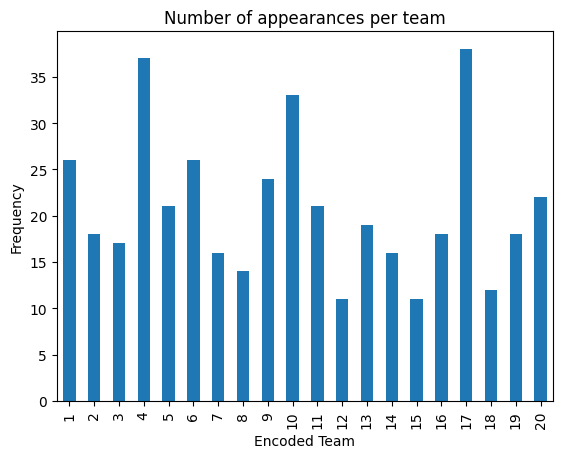

In [94]:
df = data(38)
team_list = []
for val in totw_xi_td:
    for k in val:
        team_list.append(df.loc[df['unique_id']==k].values.tolist()[0])
df = pd.DataFrame(team_list)
fig, ax = plt.subplots()
df[4].value_counts().sort_index().plot(ax = ax, kind='bar', title='Number of appearances per team', xlabel = 'Encoded Team', ylabel='Frequency')
plt.show()

We can see from the data above that the teams who generally made the highest number of appearances were the encoded teams 4, 17, and 10. These teams are Chelsea, Tottenham, and Manchester City respectively. Each of these teams has had over 30 appearances in the optimal team of the year. This makes sense, as these teams ended the season in the top 3 of the Premier League. This is compared to encoded team 15, Sunderland, which had only 11 appearances in this dataset. Sunderland ended the season being relegated to the Championship, so it makes sense that they did not make many appearances on this list.

Let's check the total number of points achieved by gameweek next.

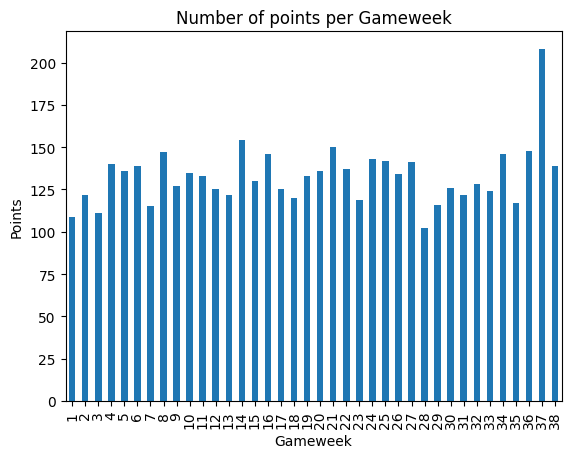

In [95]:
points_sum = []
for val in points:
    points_sum.append(sum(val))
df = pd.DataFrame(points_sum)
df.index = df.index+1
fig, ax = plt.subplots()
df[0].sort_index().plot(ax = ax, kind='bar', title='Number of points per Gameweek', xlabel = 'Gameweek', ylabel='Points')
plt.show()

The vast majority of gameweeks had a total number of points scored between 100 and 150, which is good. The only gameweek to vary far from this range is the 37th gameweek. The 37th gameweek is interesting because it is a double gameweek. As a reminder, a double gameweek occurs when one team plays more than once, so the combined score from both games is what each player gets. For example, Harry Kane attained a grand total of 31 points in this gameweek. This is because his team, Tottenham, played two games in this gameweek, leading to a superior points total. Most other teams had a double gameweek in gameweek 37, which is a reason why the total points for this gameweek are almost double the average gameweek total points. Let's next take a look at how much money we spent over the 38 gameweeks.

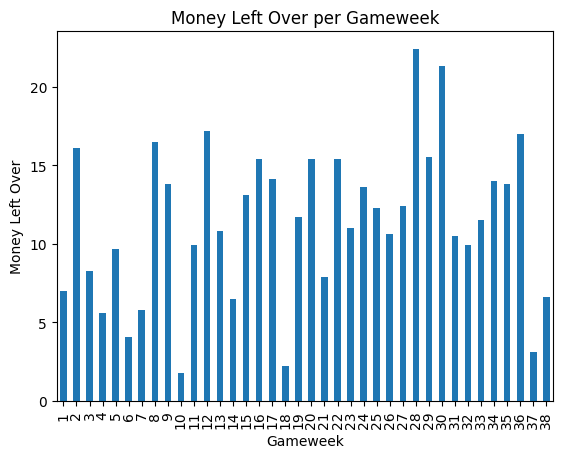

In [96]:
prices_sum = []
for val in prices:
    prices_sum.append(100 - sum(val))
i = 0
for val in subs_prices:
    prices_sum[i] -= (sum(val))
    i += 1
df = pd.DataFrame(prices_sum)
df.index = df.index+1
fig, ax = plt.subplots()
df[0].sort_index().plot(ax = ax, kind='bar', title='Money Left Over per Gameweek', xlabel = 'Gameweek', ylabel='Money Left Over')
plt.show()

Here is another interesting plot. We have £100 million to spend over every gameweek, but there are a lot of gameweeks where we spend a lot less than this total value. This means that in general, the teams of the week can be found using less than £100 million and that more expensive players do not necessarily result in more points on a week-to-week basis. This means that we have the capacity to invest in more expensive substitutes, which may lead to a higher points total for the bench boost chip.

## Humanities-Driven Analysis

It is always important to contextualise this FPL analysis to the grand scheme of things, and how these results can be related back to the English Premier League. If we create a team with the highest point returns in one season, would this team be the best possible team in general? Likely not. Let's look at some factors that are important when using Fantasy Premier League as a guide to performance of the real-life English Premier League.

One way in which player statistics are overestimated is through the scoring of goals. In FPL, a goal is always worth between 4 and 6 points, depending on the position of the player. This is a good start in evaluating how good a player is on the pitch, but it can be improved. A forward can score 30 goals in one season, totalling a whopping 120 points from pure goals. However, let's say that the forwards only scored goals against lower ranked opponents, and none of these goals have been critical for a win. FPL does not reward points for the importance of scoring a goal, but rather just scoring a goal. Compare this with another forward who scored only 10 goals in one season, but each of those were critical or match-winning goals, totalling only 40 points from pure goals. When we compare these two forwards, most people would pick the second player if they are trying to construct the best real-life Premier League team. It is important to take into account caveats like this when attempting to find the 'best' players. This goes back to the discussion of contextualising the metrics in which 'best' is measured.

On the other hand, one position which is underestimated in the FPL game is defensive midfielder. Defensive midfielders generally do not attack as readily as the forwards or other midfielders, and hence are unlikely to get the 5 points per goal scored in a given game. Furthermore, they are denied of any more than one point for executing a successful clean sheet in a game, in turn severely narrowing down the chances of getting more than two points per game. So, in FPL terms, they are generally less sought out for than defenders, who are eligible for clean sheet bonuses, and other midfielders and forwards, who are more likely to score. Does this mean that defensive midfielders are not important, and can be dropped from their Premier League teams? Definitely not! In fact, there are many people who argue that defensive midfielders are the key between the defense and the attack, hence making them the most important outfield player on the team. This is another example of a caveat to take into account when finding the 'best' players.

On a more genral note, the total number of points attained by a team in a specific match may not completely show how well a team played. Let's say that Team A is much better than Team B, but Team B managed to draw 1-1 with them. Team A scored their goal in the 6th minute of the game, and Team B equalised via an own goal in the 17th minute of the game. Team B played an amazing game, and were rock solid defensively after they were able to equalise. They did not try to score a second goal, but rather tried to maintain the 1-1 scoreline for the final 73 minutes of the game, which they achieved. If we watched that game, we would like to say that every player on Team B played in an outstanding fashion defensively. However, through the FPL scoring system, no player on Team B achieved more than 2 points. FPL total points is not an accurate method in which one can track performance, because the points achieved in FPL is measured through a specific metric, and players on a real-life Premier League team are trying to do what is best for their team, and not trying to maximise their own points on FPL. Hence, we can conclude that total points is not an accurate representation of player performance.

Another reason as to why some players perform well during some matches and not others is because of the players around them. Kevin De Bruyne is one of the most gifted playmakers in the English Premier League and plays for Manchester City. He gets a lot of assists for the main striker of the team, Sergio Aguero. They have a terrific link-up play together, and a lot of Sergio Aguero's chances were created by Kevin De Bruyne. It is then not surprising to see that in games were Kevin De Bruyne was out injured, Sergio Aguero generally did not score many goals, if any. It is important to take into account humanistic factors when attempting to find an optimal team, because sometimes a seemingly small injury, for example an impact injury on an important player, could completely affect the entire team's performance.

## Discussion & Conclusion

Through the analysis of the 2016-2017 FPL gameweek datasets, we were able to find an optimised team that maximises the total number of points whilst adhering to the multiple constraints that the game induces on the manager. By picking the highest-scoring players every week and desirably playing the wildcard and chips, we were able to attain a grand total of 4359 points over the course of the season using the cumulative transfer-dependent constrained team of the week methodology. We were able to manipulate dataframes and extract the meaningful columns, as well as attempt different methods of achieving a high grand total, including the team of the week and team of the year approaches.

There are, however, limitations to the analysis that has been done. Most notably, the method in which we find the optimal substitutes is slightly flawed, resulting in low bench boost results. Furthermore, in FPL, the prices of players fluctuate throughout the season, so the selling price changes over time if the manager decides to keep it. This has not been implemented in the project. A third limitation is the weekly free transfers. This project assigns 34 free transfers per season rather than one per gameweek. These limitations can serve as future tasks that can be implemented to hopefully find a more accurate points value. However, the 4359 points that were attained in this project can definitely serve as a benchmark for future endeavours.

In the grand scheme of things, this analysis can be the first step in building a machine learning predictive model to build an optimal team for the upcoming 2023-2024 Premier League season. With further analysis of the cumulative transfer-dependent constrained team of the week in this project, and extracting important features, we can start building a predictive model to hopefully optimise the points FPL points for a future season. 